In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dc_bikeshare = pd.read_csv('Bike share.csv', sep=',')

/var/folders/5d/2f43d6ts64x5bt51z8p0j2dc0000gn/T/ipykernel_79910/935165319.py:6: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  dc_bikeshare = pd.read_csv('Bike share.csv', sep=',')


In [2]:
dc_bikeshare

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10693992,1E69FA72F720F2E7,classic_bike,2023-12-31 23:58:06,2024-01-01 00:12:29,King St & Peyton St,31955.0,Market Square / King St & Royal St,31042.0,38.806002,-77.055911,38.804718,-77.043363,member
10693993,BA9E9FDBFAFDE618,electric_bike,2023-12-31 23:58:27,2024-01-01 00:02:28,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,Lincoln Park / 13th & East Capitol St NE,31619.0,38.884185,-76.995396,38.890461,-76.988355,member
10693994,F3B6C6BFB1F738D0,classic_bike,2023-12-31 23:59:27,2024-01-01 02:09:11,22nd & P ST NW,31285.0,23rd & E St NW,31260.0,38.909394,-77.048728,38.896104,-77.049882,casual
10693995,D2DB18DB58BC83D2,classic_bike,2023-12-31 23:59:30,2024-01-01 02:02:07,22nd & P ST NW,31285.0,22nd & P ST NW,31285.0,38.909394,-77.048728,38.909394,-77.048728,casual


In [3]:
dc_bikeshare.info

<bound method DataFrame.info of                    ride_id  rideable_type           started_at  \
0         5CB9DFCECF79AF84   classic_bike  2021-01-01 00:08:33   
1         629E059504606547  electric_bike  2021-01-01 00:13:43   
2         E74069873161EE33  electric_bike  2021-01-01 00:14:32   
3         91F95E512CABC46A   classic_bike  2021-01-01 00:15:45   
4         DA46A05139C0EA2F   classic_bike  2021-01-01 00:17:46   
...                    ...            ...                  ...   
10693992  1E69FA72F720F2E7   classic_bike  2023-12-31 23:58:06   
10693993  BA9E9FDBFAFDE618  electric_bike  2023-12-31 23:58:27   
10693994  F3B6C6BFB1F738D0   classic_bike  2023-12-31 23:59:27   
10693995  D2DB18DB58BC83D2   classic_bike  2023-12-31 23:59:30   
10693996  095E4B13F44E3643  electric_bike  2023-12-31 23:59:38   

                     ended_at  \
0         2021-01-01 00:33:53   
1         2021-01-01 00:29:34   
2         2021-01-01 00:28:45   
3         2021-01-01 00:21:20   
4         

In [4]:
dc_bikeshare.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [5]:
unique_values_before = dc_bikeshare.nunique()
print("Unique values before conversion:\n", unique_values_before, '\n')

Unique values before conversion:
 ride_id               10693997
rideable_type                3
started_at             9649173
ended_at               9638365
start_station_name         860
start_station_id          1891
end_station_name           865
end_station_id            1904
start_lat               570110
start_lng               617671
end_lat                 173835
end_lng                 183886
member_casual                2
dtype: int64 



In [6]:
# Check Memory usage before converting
memory_usage = dc_bikeshare.memory_usage(deep=True)
print("Memory Usage before Converting dtypes:\n", memory_usage, '\n')

Memory Usage before Converting dtypes:
 Index                       132
ride_id               695109805
rideable_type         654238494
started_at            727191796
ended_at              727191796
start_station_name    740478725
start_station_id      343549594
end_station_name      736905216
end_station_id        343530364
start_lat              85551976
start_lng              85551976
end_lat                85551976
end_lng                85551976
member_casual         588169835
dtype: int64 



In [7]:
# Copy the dataframe
dc_bikeshare_2 = dc_bikeshare.copy()

# Convert categorical columns to category type for memory efficiency
dc_bikeshare_2["rideable_type"] = dc_bikeshare_2["rideable_type"].astype("category")
dc_bikeshare_2["start_station_name"] = dc_bikeshare_2["start_station_name"].astype("category")
dc_bikeshare_2["end_station_name"] = dc_bikeshare_2["end_station_name"].astype("category")
dc_bikeshare_2["member_casual"] = dc_bikeshare_2["member_casual"].astype("category")

# Convert started_at and ended_at to datetime for memory efficiency
dc_bikeshare_2['started_at'] = pd.to_datetime(dc_bikeshare_2['started_at'])
dc_bikeshare_2['ended_at'] = pd.to_datetime(dc_bikeshare_2['ended_at'])

# Regenerate the entire ride_id column with sequential integers and convert it
# to a memory-efficient data type (uint32)
dc_bikeshare_2['ride_id'] = pd.Series(range(1, len(dc_bikeshare_2) + 1), dtype='uint32')

In [8]:
# Check info and dtypes after conversion
info_after = dc_bikeshare_2.info()
print("Info of the DataFrame after conversion:\n", info_after, '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693997 entries, 0 to 10693996
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             uint32        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  category      
 5   start_station_id    object        
 6   end_station_name    category      
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       category      
dtypes: category(4), datetime64[ns](2), float64(4), object(2), uint32(1)
memory usage: 754.8+ MB
Info of the DataFrame after conversion:
 None 



In [9]:
# Check unique values after conversion
unique_values_after = dc_bikeshare_2.nunique()
print("Unique values after conversion:\n", unique_values_after, '\n')

Unique values after conversion:
 ride_id               10693997
rideable_type                3
started_at             9649173
ended_at               9638365
start_station_name         860
start_station_id          1891
end_station_name           865
end_station_id            1904
start_lat               570110
start_lng               617671
end_lat                 173835
end_lng                 183886
member_casual                2
dtype: int64 



In [10]:
# Check memory usage after all conversions
print("Memory Usage after Converting dtype:\n", dc_bikeshare_2.memory_usage(deep=True), '\n')

Memory Usage after Converting dtype:
 Index                       132
ride_id                42775988
rideable_type          10694288
started_at             85551976
ended_at               85551976
start_station_name     21485201
start_station_id      343549594
end_station_name       21485559
end_station_id        343530364
start_lat              85551976
start_lng              85551976
end_lat                85551976
end_lng                85551976
member_casual          10694215
dtype: int64 



In [12]:
reduction = dc_bikeshare_2.memory_usage(deep=True).sum() / dc_bikeshare.memory_usage(deep=True).sum()
print(f"We reduced the in-memory footprint of the dataset to {reduction:.2f} of its original size.")

We reduced the in-memory footprint of the dataset to 0.22 of its original size.


# DATA WRANGLING

In [13]:
pd.concat([dc_bikeshare_2.describe()], axis=1, keys=["DC BikeShare Stats",])

DC BikeShare Stats                                 \
                 ride_id                     started_at   
count       1.069400e+07                       10693997   
mean        5.346999e+06  2022-09-13 17:52:21.865432320   
min         1.000000e+00            2021-01-01 00:08:33   
25%         2.673500e+06            2021-12-16 10:45:23   
50%         5.346999e+06            2022-09-22 08:29:17   
75%         8.020498e+06            2023-06-18 21:42:53   
max         1.069400e+07            2023-12-31 23:59:38   
std         3.087091e+06                            NaN   

                                                                  \
                            ended_at     start_lat     start_lng   
count                       10693997  1.069400e+07  1.069400e+07   
mean   2022-09-13 18:15:16.333648896  3.890331e+01 -7.703187e+01   
min              2021-01-01 00:21:00  3.876000e+01 -7.740000e+01   
25%              2021-12-16 11:00:56  3.889054e+01 -7.704461e+01   
50%              2022-09-22 08:44:49  3.890276e+01 -7.703162e+01   
75%              2023-06-18 22:08:16  3.891475e+01 -7.701367e+01   
max              2024-01-02 00:41:36  3.914000e+01 -7.682000e+01   
std                              NaN  2.684224e-02  3.346229e-02   

                                   
            end_lat       end_lng  
count  1.067723e+07  1.067723e+07  
mean   3.890226e+01 -7.703146e+01  
min    0.000000e+00 -7.756000e+01  
25%    3.889050e+01 -7.704466e+01  
50%    3.890231e+01 -7.703150e+01  
75%    3.891265e+01 -7.701281e+01  
max    3.919000e+01  0.000000e+00  
std    5.049333e-02  9.127758e-02

In [14]:
dc_bikeshare_2

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,1,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
1,2,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual
2,3,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,4,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,5,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10693992,10693993,classic_bike,2023-12-31 23:58:06,2024-01-01 00:12:29,King St & Peyton St,31955.0,Market Square / King St & Royal St,31042.0,38.806002,-77.055911,38.804718,-77.043363,member
10693993,10693994,electric_bike,2023-12-31 23:58:27,2024-01-01 00:02:28,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,Lincoln Park / 13th & East Capitol St NE,31619.0,38.884185,-76.995396,38.890461,-76.988355,member
10693994,10693995,classic_bike,2023-12-31 23:59:27,2024-01-01 02:09:11,22nd & P ST NW,31285.0,23rd & E St NW,31260.0,38.909394,-77.048728,38.896104,-77.049882,casual
10693995,10693996,classic_bike,2023-12-31 23:59:30,2024-01-01 02:02:07,22nd & P ST NW,31285.0,22nd & P ST NW,31285.0,38.909394,-77.048728,38.909394,-77.048728,casual


<Axes: xlabel='member_casual', ylabel='Count'>

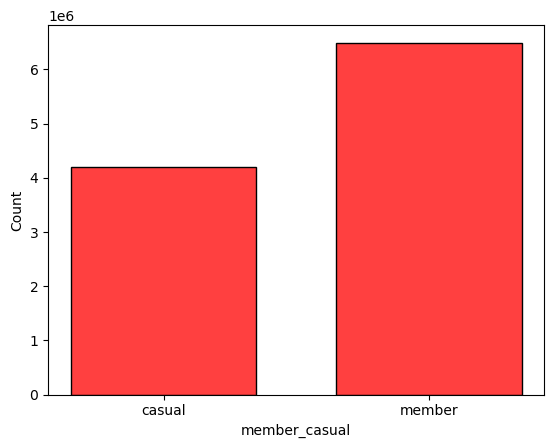

In [35]:
fig.suptitle('User')


sns.histplot(dc_bikeshare_2['member_casual'],  color='red', shrink=0.7)

